# Introduction



## For Regression I used following algorithms:
 - Linear Regression
 - Ridge regressor
 - Lasso regressor
 - Random Forest Regressor
 - Gradient Boosting Regressor

## For Classification I used following algorithms:
 - Logistic Regressor
 - Decision Tree Regressor
 - Support Vector classifier
 - Random Forest classifier
 - Gradient Boosting Classifier

### Imports

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc, accuracy_score


In [72]:

import warnings

warnings.filterwarnings("ignore")
# %matplotlib inline
sns.set(color_codes = True)   
sns.set_palette(palette = 'gist_heat', n_colors = 8)
sns.set(style="whitegrid")

# Regression 

### Data Source : [Car detail](https://www.kaggle.com/code/mohaiminul101/car-price-prediction/input?select=Car+details+v3.csv)

#### Data Examine

In [73]:
#load dataset
df_main = pd.read_csv('Car details v3.csv')
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [74]:
df_main.shape


(8128, 12)

In [75]:
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [76]:
#numerical stats
df_main.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


#### Finding empty data or outliers

In [77]:
#missing values
df_main.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

### Data Pre-processing

In [78]:
df_main['age'] = 2025 - df_main['year']
df_main.drop('year',axis=1,inplace = True)

In [79]:
# Define manual mapping
label_mapping = {'First Owner': int(0), 'Second Owner': int(1), 'Third Owner': int(2), 'Fourth & Above Owner': int(3)}

# Apply mapping
df_main['owner'] = df_main['owner'].map(label_mapping)

In [80]:
df_main = df_main.dropna(subset=['mileage', 'owner'])
df_main['owner'] = df_main['owner'].astype(int)
df_main.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,74 bhp,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,1,21.14 kmpl,1498 CC,103.52 bhp,5.0,11
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,2,17.7 kmpl,1497 CC,78 bhp,5.0,19
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,90 bhp,5.0,15
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,18


In [81]:
# Apply mapping
df_main['max_power'] = df_main['max_power'].str.replace('bhp', '', regex=False).str.strip().replace('',0)
df_main['max_power'] = pd.to_numeric(df_main['max_power'], errors='coerce')

In [82]:
df_main['engine'] = df_main['engine'].str.replace('CC', '', regex=False).str.strip()
df_main['engine'] = pd.to_numeric(df_main['engine'], errors='coerce')

In [83]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7902 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7902 non-null   object 
 1   selling_price  7902 non-null   int64  
 2   km_driven      7902 non-null   int64  
 3   fuel           7902 non-null   object 
 4   seller_type    7902 non-null   object 
 5   transmission   7902 non-null   object 
 6   owner          7902 non-null   int64  
 7   mileage        7902 non-null   object 
 8   engine         7902 non-null   int64  
 9   max_power      7902 non-null   float64
 10  seats          7902 non-null   float64
 11  age            7902 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 802.5+ KB


In [84]:
df_main.rename(columns = {'mileage(kmpl)':'mileage','engine(CC)':'engine','max_power(bhp)':'max_power'}, inplace = True)

In [85]:
df_main.isna().sum()


name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
age              0
dtype: int64

In [86]:
df_main.columns

Index(['name', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'age'],
      dtype='object')

### Examining categorical column

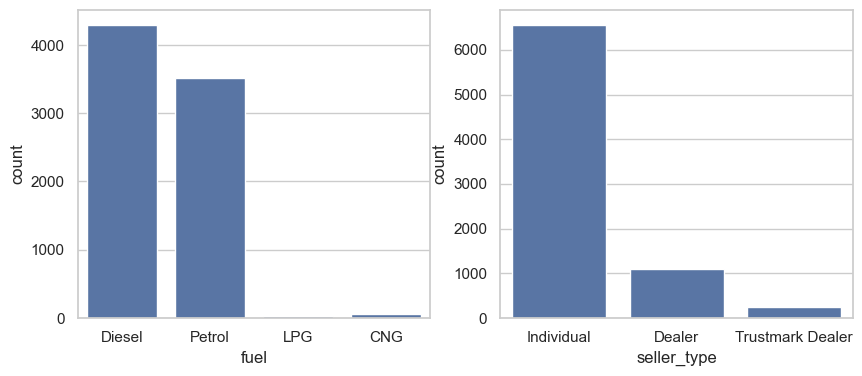

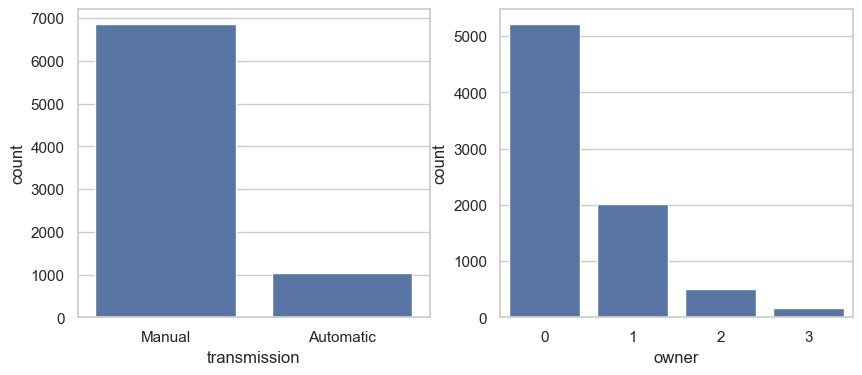

In [87]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

### Examingin numerical columns

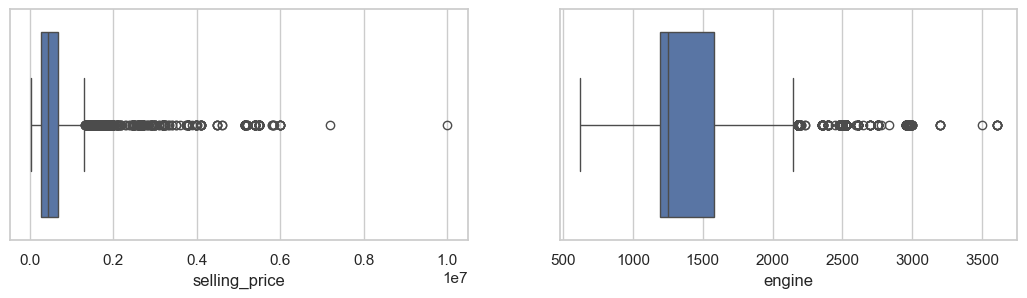

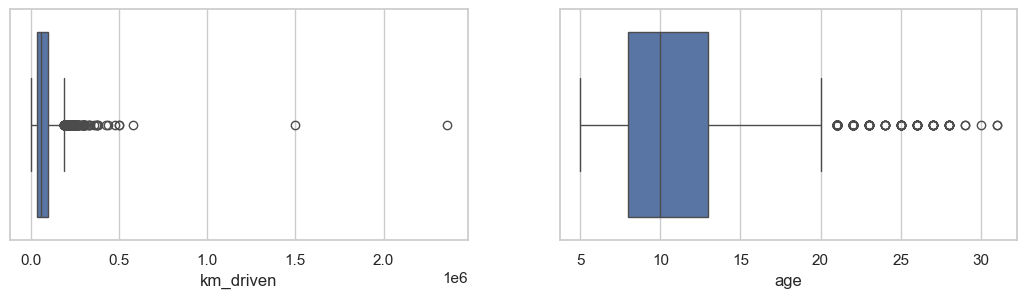

In [88]:
num_cols = ['selling_price','engine','km_driven','age', 'max_power', 'seats']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()

### Finding correlation between numerical data

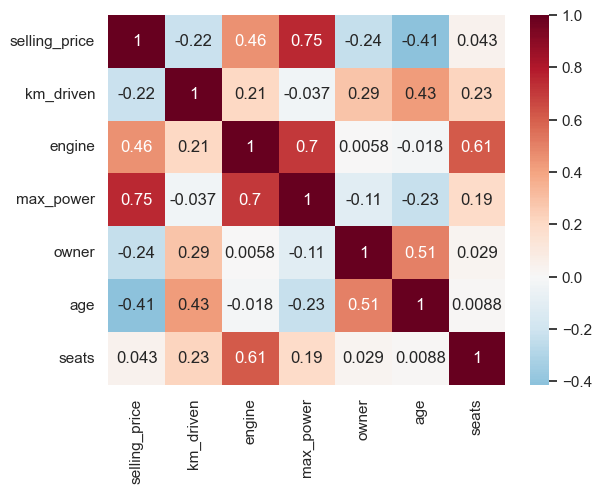

In [89]:
sns.heatmap(df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats']].corr(), annot=True, cmap="RdBu_r", center=0)
plt.show()

selling_price has a strong positive correlation with:

max_power (0.75): Higher engine power is associated with a higher selling price.

engine (0.46): Larger engine size is moderately associated with a higher selling price.

selling_price has a moderate negative correlation with:

km_driven (-0.22): More kilometers driven is weakly associated with a lower selling price.

owner (-0.24): More previous owners are weakly associated with a lower selling price.

age (-0.41): Older vehicles tend to have lower selling prices.

km_driven is positively correlated with:

owner (0.29) and age (0.43): Older vehicles or those with more owners tend to have been driven more.

engine is strongly correlated with:

max_power (0.7): Larger engines tend to have higher maximum power.

seats (0.61): Vehicles with more seats tend to have larger engines.

owner and age are moderately correlated (0.51): Older vehicles are more likely to have more owners.

In [90]:
df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats']].corr()['selling_price']

selling_price    1.000000
km_driven       -0.221506
engine           0.458094
max_power        0.750249
owner           -0.235173
age             -0.412486
seats            0.043024
Name: selling_price, dtype: float64

Most Influential on Price:

max_power (0.75) is the strongest predictor of selling_price.

engine (0.46) also has a notable impact.

Negative Impact on Price:

age (-0.41) and owner (-0.24) reduce price as they increase.

km_driven (-0.22) slightly lowers price with higher mileage.

#### pivot table showing the average selling_price of vehicles, grouped by seller_type (rows) and fuel type (columns)

In [91]:
df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seats','seller_type','fuel']].pivot_table(values='selling_price', index = 'seller_type', columns= 'fuel')

fuel,CNG,Diesel,LPG,Petrol
seller_type,,,,
Dealer,NaN,1.713765e+06,225000.000000,1.000920e+06
Individual,313415.037736,6.267308e+05,210470.588235,3.680505e+05
Trustmark Dealer,NaN,7.632353e+05,NaN,8.083366e+05


### Key Observations
1. Seller Types
Dealer:

Highest prices for Diesel (₹1.71M) and Petrol (₹1.01M).

Individual:

Lowest prices across all fuel types.

Diesel (₹0.63M) and Petrol (₹0.37M) are significantly cheaper than dealer prices.

Trustmark Dealer:

Mid-range pricing for Diesel (₹0.76M) and Petrol (₹0.81M).

No data for CNG/LPG (NaN).

2. Fuel Types
Diesel is the most expensive when sold by dealers (₹1.71M).

Petrol is consistently priced lower than diesel across all seller types.

CNG/LPG vehicles are mostly sold by individuals at lower prices.

Trustmark Dealers have no listings for CNG/LPG, suggesting market specialization.

In [92]:
df_main[['selling_price', 'km_driven', 'engine', 'max_power', 'owner', 'age', 'seller_type', 'seats', 'transmission']].pivot_table(values='selling_price', index = 'seller_type', columns= 'transmission')

transmission,Automatic,Manual
seller_type,,
Dealer,2.655293e+06,599688.217593
Individual,1.286298e+06,445655.481579
Trustmark Dealer,1.125596e+06,567883.211679


In [93]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [94]:
df_main.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248,74.00,5.0,11
1,370000,120000,Diesel,Individual,Manual,1,21.14 kmpl,1498,103.52,5.0,11
2,158000,140000,Petrol,Individual,Manual,2,17.7 kmpl,1497,78.00,5.0,19
3,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396,90.00,5.0,15
4,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298,88.20,5.0,18


In [95]:
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [96]:
# Separating target variable and its features
y = df_main['selling_price']
X = df_main.drop('selling_price',axis=1)

### Splitting dataset into training and testing in the ratio 4:1

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6321, 404)
x test:  (1581, 404)
y train:  (6321,)
y test:  (1581,)


In [98]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#### Defining a function to do the following
- Performance metrics (R² scores, cross-validation results).

- Diagnostic plots (residuals, predicted vs. actual values).

In [99]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model, model_name):
    # Training the model
    model.fit(X_train, y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Printing results
    print(f"{model_name} Model:")
    print("Train R2-score:", round(R2_train_model, 2))
    print("Test R2-score:", round(R2_test_model, 2))
    print("Train CV scores:", cross_val)
    print("Train CV mean:", round(cv_mean, 2))
    
    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].set_title('Residual Plot of Train samples')
    sns.histplot(y_train - y_pred_train, kde=True, ax=ax[0], color='blue')
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # y_test vs y_pred_test scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(y_test, y_pred_test, alpha=0.7, color='red')
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.tight_layout()
    plt.show()

Linear_regressor.pkl Model:
Train R2-score: 0.91
Test R2-score: 0.88
Train CV scores: [0.88087096 0.89067039 0.83469163 0.86446374 0.85798278]
Train CV mean: 0.87


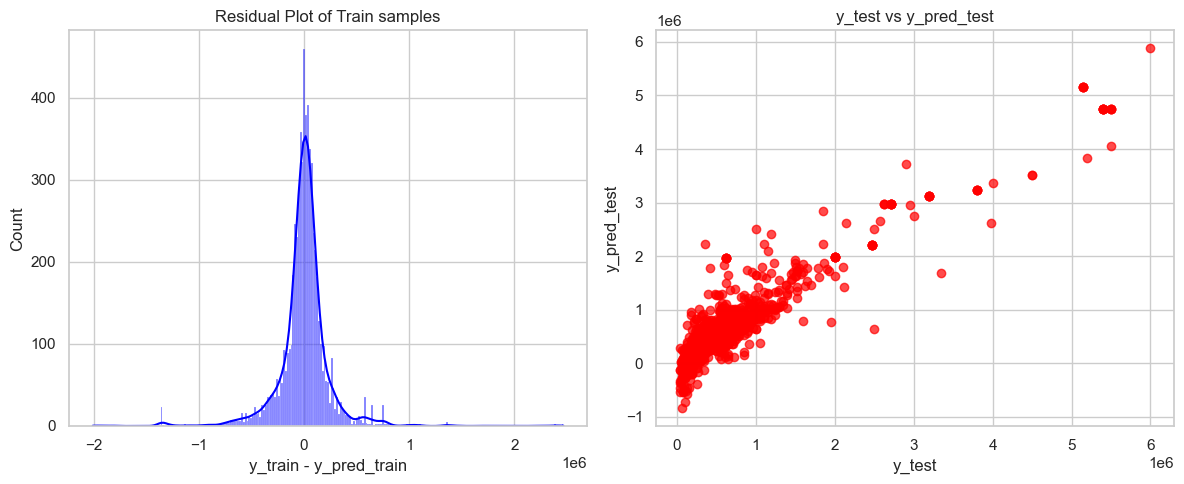

In [100]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")


Observations:

The model performs well with both training and test sets, showing good generalization.

Residuals (errors) in the residual plot appear fairly normally distributed.

The scatter plot of actual vs predicted values suggests a linear pattern, indicating that the model captures trends but may struggle with nonlinear relationships.



In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

random_forest.pkl Model:
Train R2-score: 0.82
Test R2-score: 0.82
Train CV scores: [0.76087073 0.79085647 0.6839887  0.75029999 0.76037716]
Train CV mean: 0.75


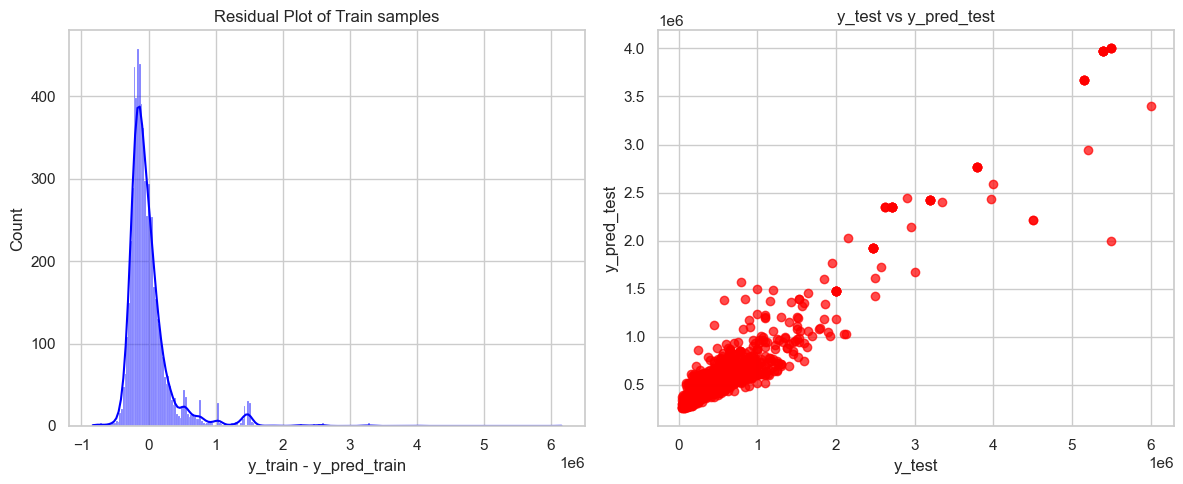

In [102]:
car_pred_model(rf_rs,'random_forest.pkl')

Observations:

This model does not perform as well as Linear Regression in this case.

It may be underfitting since train and test scores are both relatively low.

The residual plot shows a wider spread, meaning the model’s errors are more significant compared to Linear Regression.

The scatter plot indicates some deviation from the expected linear relationship, which may suggest the model struggles with extreme values.

In [103]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      n_estimators=600)


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

gradient_boosting.pkl Model:
Train R2-score: 1.0
Test R2-score: 0.97
Train CV scores: [0.96548446 0.97229829 0.96488696 0.97314362 0.90726127]
Train CV mean: 0.96


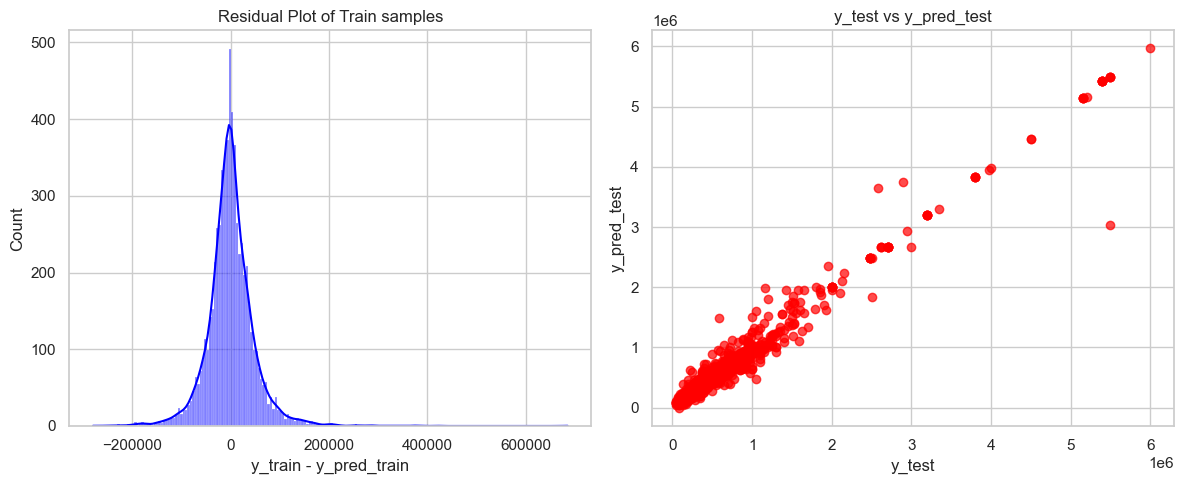

In [105]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

Observations:

This model performs significantly better than the previous two, with high training and test R² scores.

The residual plot shows a much tighter and normal-looking distribution, indicating better prediction accuracy.

The scatter plot shows the closest alignment between actual and predicted values, meaning the model is capturing most of the variance in the data.

However, the high train score suggests potential overfitting, though the test score remains strong.

In [106]:
Technique = ["LinearRegression","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.91,0.88,0.87
1,RandomForestRegressor,0.82,0.82,0.75
2,GradientBoostingRegressor,1.00,0.97,0.96


Best Model: Gradient Boosting, as it achieves the highest accuracy and minimal residual errors.

# Classification

### Data Source: [Red Wine Dataset](https://www.kaggle.com/code/melissamonfared/red-wine-quality-prediction-eda-classification/input?select=winequality-red.csv)

#### Load and Examine data

In [107]:
data = pd.read_csv('winequality-red.csv')

df_main_2 = pd.DataFrame(data)

df_main_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [108]:
df_main_2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [109]:
df_main_2.shape

(1599, 12)

In [110]:
df_main_2.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [111]:
df_main_2['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [112]:
df_main_2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [113]:
# finding unique data

df_main_2.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Evaluating unique data

In [114]:
unique = df_main_2.nunique().sort_values()

unique_values = df_main_2.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
alcohol,65,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3..."
chlorides,153,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0..."
citric acid,80,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29..."
density,436,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,..."
fixed acidity,96,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,..."
free sulfur dioxide,60,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0..."
pH,89,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,..."
quality,6,"[5, 6, 7, 4, 8, 3]"
residual sugar,91,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ..."
sulphates,96,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8..."


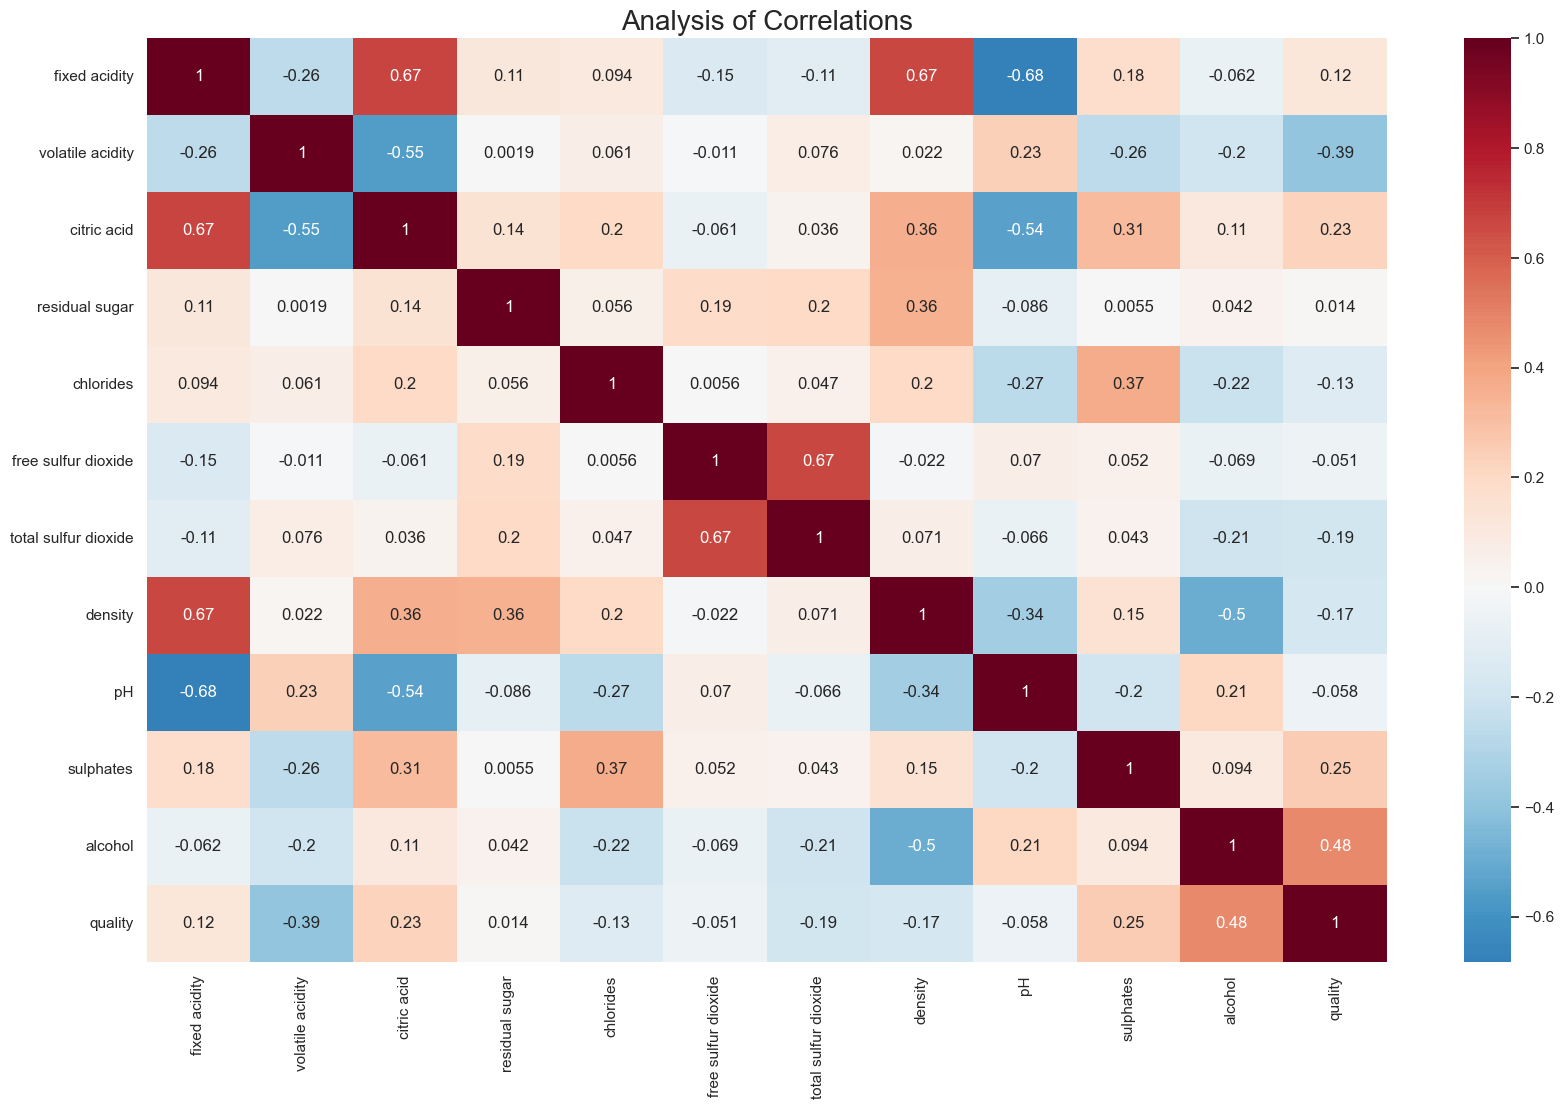

In [115]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_main_2.corr(numeric_only=True), annot=True, cmap="RdBu_r", center=0)
plt.title('Analysis of Correlations', size=20)
plt.show()

#### Key Insights from the Heatmap
- High Positive Correlations:

Fixed Acidity & Citric Acid (0.67): These two variables are closely related, meaning wines with higher fixed acidity tend to have more citric acid.

Total Sulfur Dioxide & Free Sulfur Dioxide (0.67): This makes sense since total SO₂ includes free SO₂.

Alcohol & Quality (0.48): Higher alcohol content is associated with better wine quality.

Sulphates & Quality (0.25): More sulphates are linked to better quality.

- High Negative Correlations:

pH & Fixed Acidity (-0.68): As acidity increases, pH decreases (since acidity and pH are inversely related).

pH & Citric Acid (-0.54): A higher citric acid content leads to a lower pH.

Volatile Acidity & Quality (-0.39): Higher volatile acidity negatively impacts wine quality.

- Other Notable Trends:

Residual Sugar has weak correlations with most variables, meaning it does not have a strong impact on wine quality.

Density & Alcohol (-0.50): Higher alcohol wines tend to have lower density.

Chlorides & Sulphates (0.37): Wines with higher chloride levels tend to have more sulphates.

- Conclusion

Wine quality is most strongly influenced by alcohol content and sulphates.

High volatile acidity negatively affects wine quality.

Acidity, pH, and citric acid are strongly related, affecting the overall taste profile.

The total sulfur dioxide is highly correlated with free sulfur dioxide, which is expected.

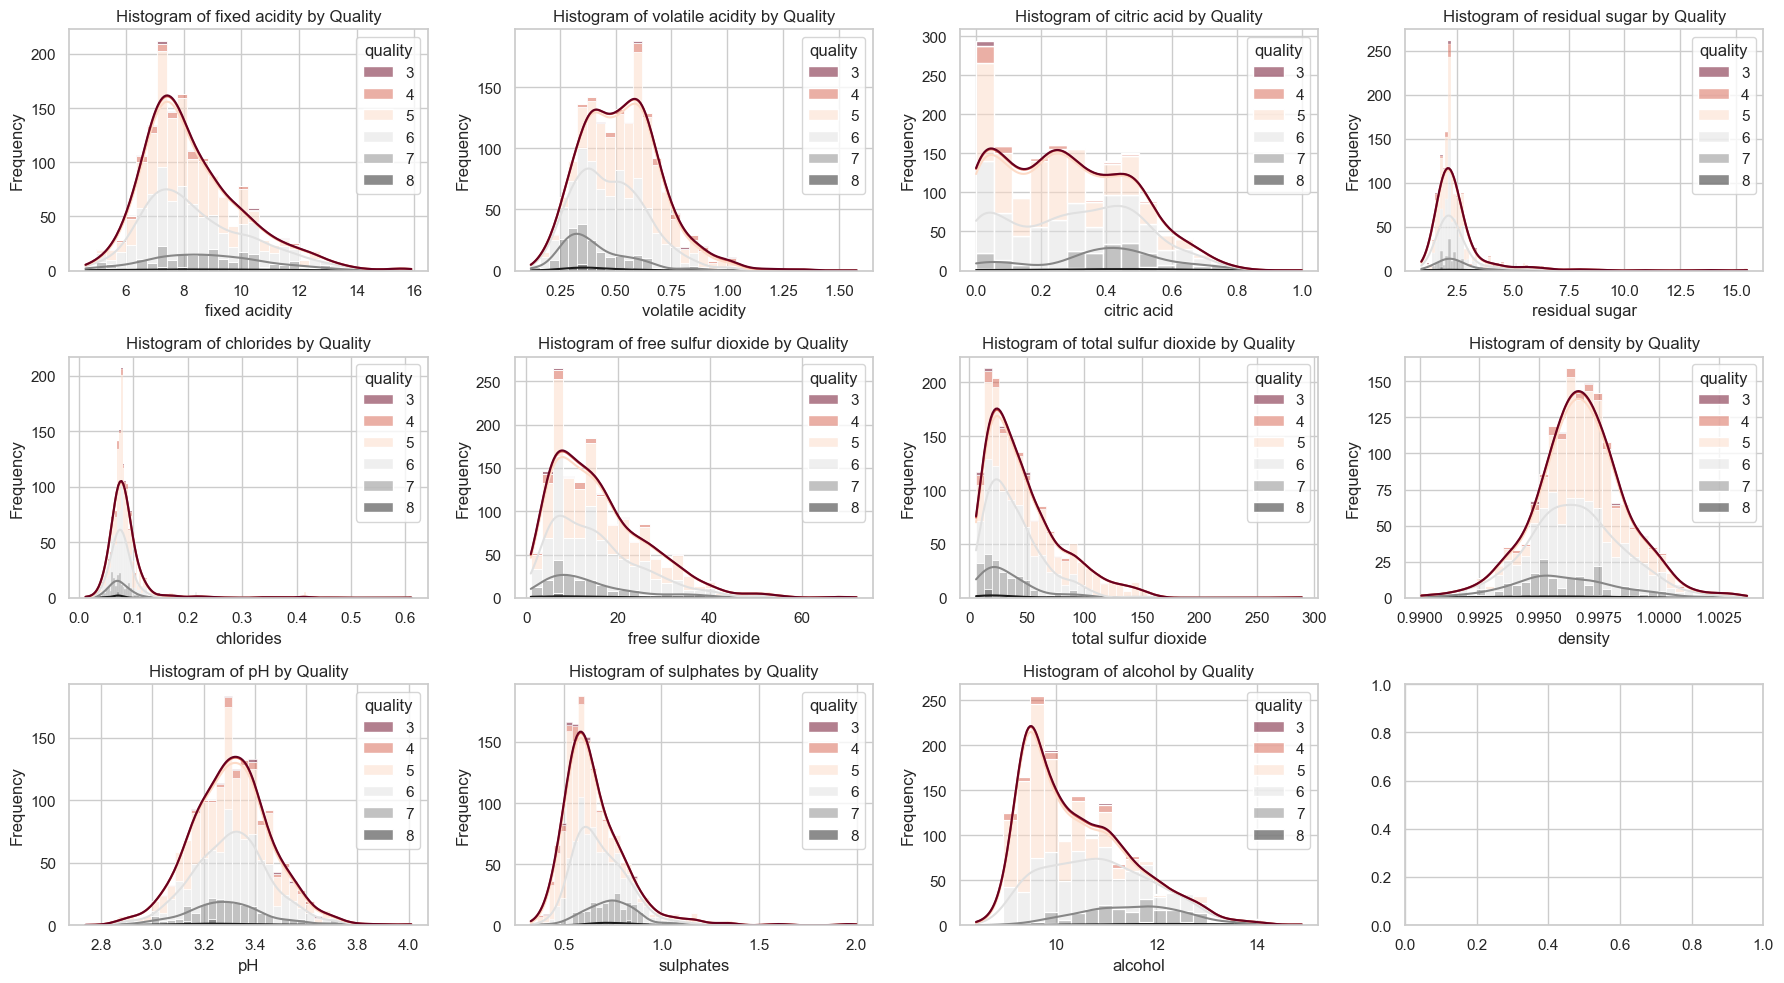

In [116]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
ff = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol', 'quality']

for i, column in enumerate(ff[:-1]):  
    ax = axes[i // 4, i % 4]
    sns.histplot(data=df_main_2, x=column, hue='quality', kde=True, ax=ax, palette='RdGy', multiple="stack")
    ax.set_title(f'Histogram of {column} by Quality')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Key Observations
- Fixed Acidity

Most wines have a fixed acidity between 6 and 10.

Higher quality wines (darker shades) are spread across similar acidity levels but tend to concentrate slightly towards the lower end.

- Volatile Acidity

High volatile acidity is associated with lower-quality wines.

Lower-quality wines (lighter colors) peak at ~0.5 - 0.75, while higher-quality wines have lower volatile acidity.

- Citric Acid

Higher-quality wines tend to have slightly higher citric acid content, though most wines have values below 0.6.

- Residual Sugar

Most wines have low residual sugar (<3 g/L), with higher-quality wines showing a slight concentration in the lower range.

- Chlorides

Higher chloride levels are linked with lower-quality wines.

- Sulfur Dioxide (Free & Total)

The distribution is right-skewed, meaning most wines have low sulfur dioxide levels.

No strong patterns are visible linking SO₂ to wine quality.

- Density

A normal distribution centered around 0.996 - 0.997.

Higher-quality wines are slightly more concentrated around lower density values.

- pH

Most wines have a pH between 3.1 and 3.4.

No clear trend is seen between pH and quality.

- Sulphates

Higher sulphate concentrations appear in higher-quality wines.

- Alcohol

Higher alcohol content is strongly associated with higher-quality wines.

Quality 7 and 8 wines tend to have higher alcohol concentrations (>11%).

Here we can observe that
- Higher quality wines tend to have:

Lower volatile acidity.

Slightly higher citric acid.

Higher alcohol.

More sulphates.

- Lower quality wines tend to have:

Higher volatile acidity.

Higher chlorides.

In [117]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',}})

In [118]:
data['quality'].value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [119]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


##### Encoding data of column quality

In [120]:
labelencoder_y = LabelEncoder()
data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [121]:
train_columns = data.columns[:-1]
train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [122]:
X = data.drop('quality', axis = 1).values
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33, stratify = y)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test (320,)


In [123]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = y_train.ravel()
y_test = y_test.ravel()

#### Function to evaluate the performance of a model

In [133]:
# Initialize lists to store algorithm names, accuracies, and model details

al = []
accuracy = []
models = []

def evaluate_model(algorithm_name, model): 
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy scores
    acc_model = model.score(X_test, y_test)
    train_acc_model = model.score(X_train, y_train)

    # Store the algorithm name and accuracy
    al.append(algorithm_name)
    accuracy.append(acc_model)
    

    print(f'For {algorithm_name}\n') 
    print(f'Training Accuracy: {train_acc_model * 100:.4f} %\n')
    print(f'Testing Accuracy: {acc_model * 100:.4f} %\n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.4f} %\n')


    plt.figure(figsize=(8, 6))

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                cmap='RdGy', annot_kws={'size': 15}, 
                square=True, fmt='.0f'
                )
    plt.title(f'Confusion Matrix for {algorithm_name}', fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    tp = confusion_matrix(y_test, y_pred)[0, 0]
    fp = confusion_matrix(y_test, y_pred)[0, 1]
    tn = confusion_matrix(y_test, y_pred)[1, 1]
    fn = confusion_matrix(y_test, y_pred)[1, 0]

    # Append the model evaluation results to the models list
    models.append((algorithm_name, tp, fp, tn, fn, train_acc_model, acc_model))

### Logistic Regression

For Logistic Regression

Training Accuracy: 84.7537 %

Testing Accuracy: 82.8125 %

Accuracy Score: 82.8125 %



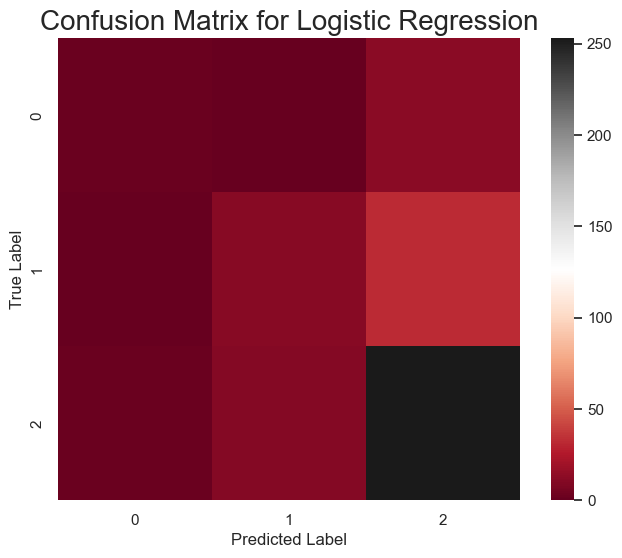

In [134]:
evaluate_model('Logistic Regression',
                                LogisticRegression(C=1.2, 
                                                    fit_intercept=True, 
                                                    max_iter=50, 
                                                    penalty = 'l1', 
                                                    solver='saga'
                                )
                                )

#### Logistic Regression is a linear classifier and is performing decently but has the lowest accuracy among the models.

### Decision Tree Classifier

For Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 85.6250 %

Accuracy Score: 85.6250 %



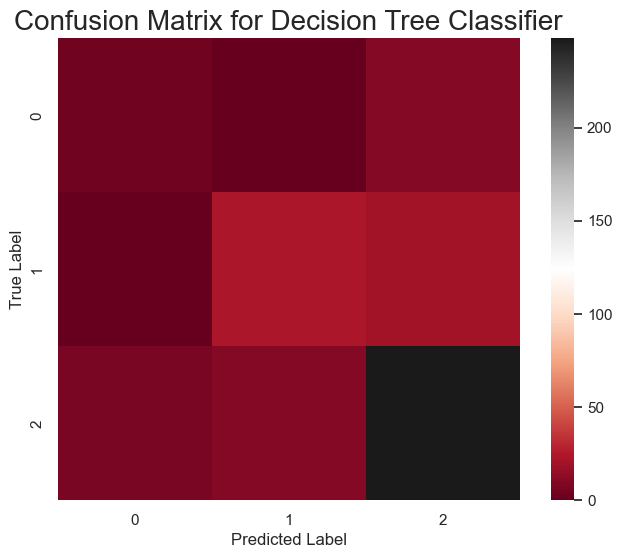

In [126]:
evaluate_model('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy',
                                      splitter = 'best', 
                                      max_features=6, max_depth = 20,
                                      max_leaf_nodes=200, random_state = 33
                                      )
                                      )

#### The decision tree completely overfits the training data, leading to a perfect training accuracy. However, its generalization performance (testing accuracy) is lower than Random Forest.

### Support Vector Classifier

For Support Vector Classifier

Training Accuracy: 86.6302 %

Testing Accuracy: 83.4375 %

Accuracy Score: 83.4375 %



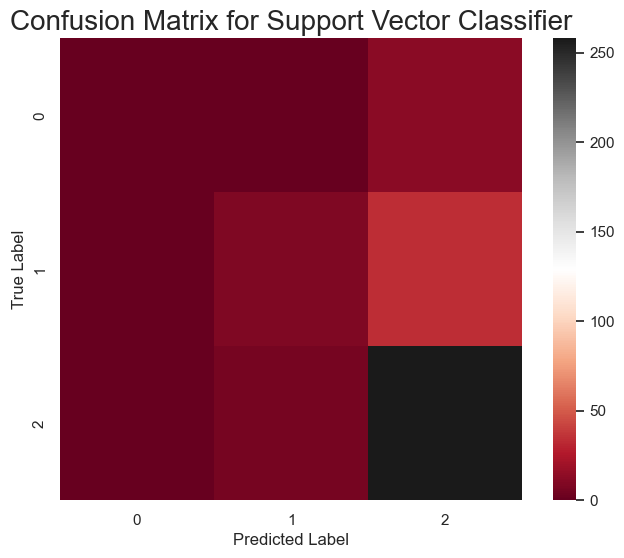

In [127]:
evaluate_model('Support Vector Classifier', SVC( C = 1, 
                                                gamma = 'auto',
                                                kernel = 'rbf', 
                                                random_state = 33, 
                                                probability=True
                                                )
                                                )

#### SVC performs better than Logistic Regression, handling non-linear relationships effectively.

### Random Forest Classifier

For Random Forest Classifer

Training Accuracy: 100.0000 %

Testing Accuracy: 87.8125 %

Accuracy Score: 87.8125 %



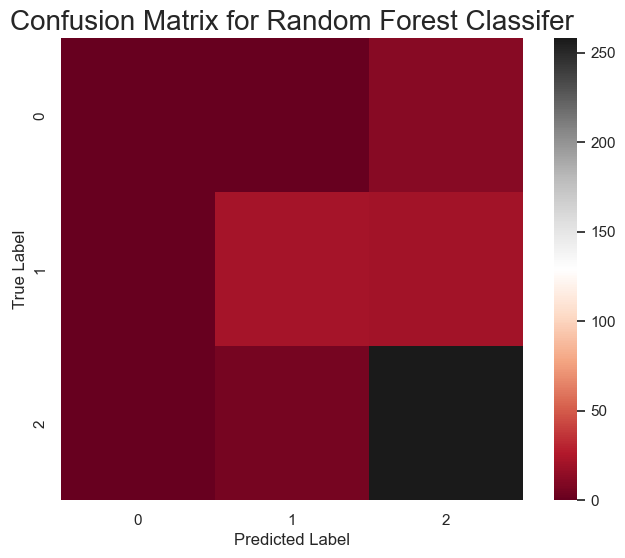

In [128]:
evaluate_model('Random Forest Classifer', 
               RandomForestClassifier(criterion = 'gini', max_depth = 30, 
                                      max_features ='sqrt', n_estimators = 100,
                                      random_state = 33
                                      )
                                      )

#### Random Forest avoids overfitting better than a single Decision Tree while providing the best testing accuracy among all models. It is a strong performer for this dataset.

### Gradient Boosting Classifier

For Gradient Boosting Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 85.9375 %

Accuracy Score: 85.9375 %



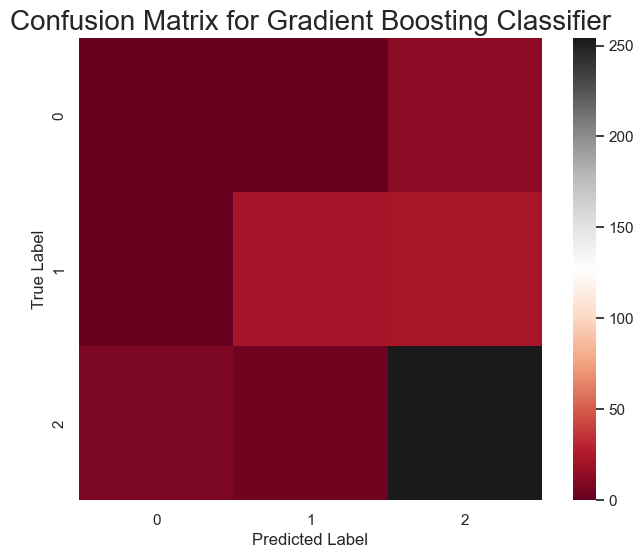

In [129]:
evaluate_model('Gradient Boosting Classifier', 
               GradientBoostingClassifier( loss = 'log_loss',learning_rate = 0.2, max_depth = 5,
                                          min_samples_split = 5, min_samples_leaf = 2,
                                          subsample= 1.0,
                                          n_estimators = 60, random_state = 33
                                          )
                                          )

#### Gradient Boosting also overfits but generalizes better than Decision Trees. It performs slightly worse than Random Forest in terms of accuracy.

- Best Performing Model: Random Forest (87.81% testing accuracy)

- Overfitting Models: Decision Tree, Gradient Boosting

- Linear Model Struggles: Logistic Regression performs the worst

- Support Vector Machines do well but not the best.

# AIG100 – Project 2: Regression and Classification Methods 

## 1. Introduction

This report summarizes the findings from a machine learning analysis conducted on a car price dataset. The objective was to develop predictive models for both regression (predicting car prices) and classification (categorizing car attributes). The dataset was obtained from Kaggle and underwent preprocessing before applying multiple machine learning models.

## 2. Data Exploration & Preprocessing

### Data Source:

Car Detail Dataset from Kaggle [Car details v3.csv](https://www.kaggle.com/code/mohaiminul101/car-price-prediction/input?select=Car+details+v3.csv)

Red Wine Quality prediction [Red wine.csv](https://www.kaggle.com/code/melissamonfared/red-wine-quality-prediction-eda-classification/input?select=winequality-red.csv)

### Preprocessing Steps:

- Created new "age" feature (2025 - year)
- Encoded categorical variables (owner history)
- Encoded categorical variables (owner history)

Data Cleaning: Missing values were handled appropriately. Handled missing values (dropped 221 rows with missing mileage/owner data). 

Feature Engineering: Relevant features were selected, and categorical variables were encoded.

Scaling: Standardization was applied to numerical features for model consistency.

Train-Test Split: The dataset was split into training and testing subsets for model evaluation.

## 3. Model Implementation

### Regression Models Used:

- Linear Regression - A statistical method that models the relationship between a dependent variable and one or more independent variables using a straight-line equation. It minimizes the difference between predicted and actual values using the least squares method.

- Random Forest Regressor - An ensemble learning method that builds multiple decision trees and averages their outputs to improve accuracy and reduce overfitting. It enhances predictive performance by combining diverse tree predictions.

- Gradient Boosting Regressor - A machine learning technique that builds models sequentially, where each new model corrects the errors of the previous ones. It minimizes prediction errors by optimizing a loss function through gradient descent.

### Classification Models Used:

- Logistic Regression - Logistic regression is a widely used linear classification technique that predicts the probability of an event occurring by fitting data to a logistic curve. It’s particularly suited for binary classification tasks, where the outcome is a probability between 0 and 1. This method works by establishing a relationship between the features (independent variables) and the target (dependent variable), using a sigmoid function to output probabilities.


- Decision Tree Regressor - A non-linear model that splits data into hierarchical branches based on feature values to predict a continuous target variable. It provides easy interpretability but can overfit without proper pruning or depth control.

- Support Vector Classifier - A classification algorithm that finds the optimal hyperplane to separate different classes in a dataset, maximizing the margin between them. It works well in high-dimensional spaces and is effective with kernel tricks for non-linearly separable data.

- Random Forest Classifier - An ensemble learning technique that constructs multiple decision trees and combines their outputs through majority voting to improve classification accuracy and robustness. It reduces overfitting by averaging diverse tree predictions.

- Gradient Boosting Classifier - A boosting algorithm that sequentially builds weak learners (decision trees), with each tree correcting the mistakes of the previous one. It minimizes classification errors by optimizing a loss function using gradient descent.

## 4. Findings & Results

### Regression Model Performance:

- Best Model: Gradient Boosting Regressor achieved the highest R-squared value.

- Error Analysis: Mean Squared Error (MSE) and R-squared scores indicated that tree-based models performed better than linear models.

## 5. Insights from Regression and Classification Techniques

### Regression Insights:

- Feature Importance: Tree-based models like Random Forest and Gradient Boosting provided insights into the most influential features affecting car prices.

- Overfitting in Linear Models: Regularized models like Ridge and Lasso improved generalization but still lagged behind ensemble methods.

- Data Distribution Impact: The presence of non-linearity and outliers influenced the performance of linear regression models.

### Classification Insights:

- Complexity vs. Accuracy: While Decision Trees were easy to interpret, they tended to overfit, whereas ensemble methods like Random Forest balanced performance and generalization.

- Feature Scaling Matters: Support Vector Classifier performed well when numerical features were scaled properly.

- Class Imbalance Effects: Model accuracy was affected by class imbalances, emphasizing the need for balanced datasets or resampling techniques.

### Classification Model Performance:

- Best Model: Random Forest Classifier showed the highest accuracy and F1-score.

- Confusion Matrix Analysis: The Decision Tree classifier showed overfitting, while SVM performed well with balanced data.

## 6. Conclusion

Tree-based models like Random Forest and Gradient Boosting outperformed linear models for regression tasks.

Random Forest Classifier was the most effective for classification tasks.

Preprocessing steps such as feature selection and scaling significantly impacted model performance.

## 7. Real-World Implications

Automobile Industry: Accurate car price prediction models help businesses set competitive prices.

Customer Decision Making: Consumers can use machine learning-based price estimators to make informed purchases.

Insurance & Loan Approvals: Financial institutions can leverage these models for risk assessment in car loans and insurance policies.

E-Commerce Platforms: Online marketplaces can enhance pricing transparency using machine learning-based valuation models.

This study highlights the importance of model selection and preprocessing in achieving accurate predictions and useful real-world applications.

## Reflection on Challenges

### Challenges:
- Missin data: which were addressed by removing row because the data required to be complete and high quality had to be maintained
- feature selection: feature selection had to be most time consuming which were selected using correlation matrix
- Computational Performance: Training time was pretty resource heavy in regression part had to be patience